<a href="https://colab.research.google.com/github/youssefelsawy9/ai/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df = pd.read_csv('ecommerce_customer_data_large.csv')


df.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


Missing values in each column:
Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

Missing values in each column after replacement:
Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

First few rows of the updated DataFrame:
   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  

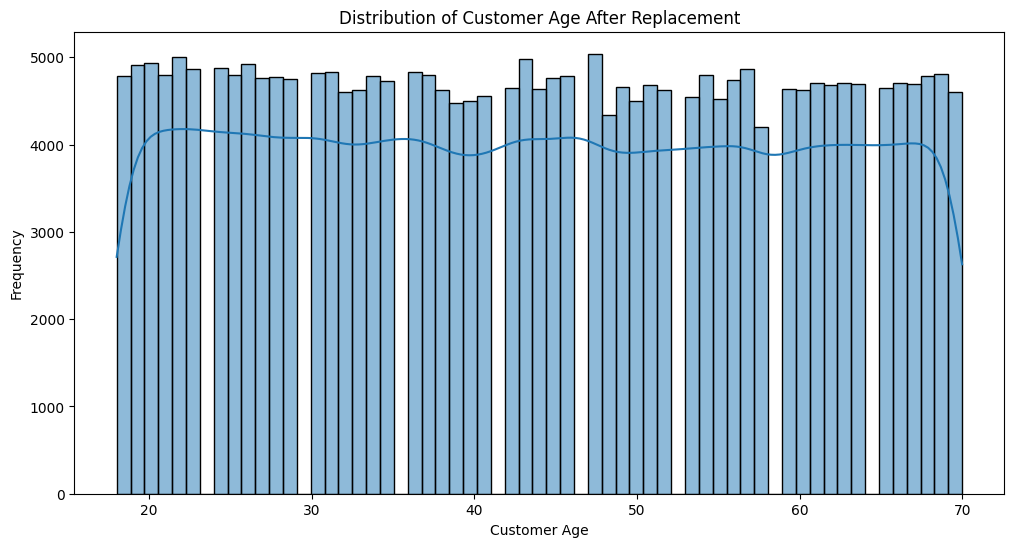

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('ecommerce_customer_data_large.csv')

# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Convert necessary columns to numeric
numeric_columns = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'Age', 'Returns']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN

# Replace missing values in all specified numeric columns with their mean
for col in numeric_columns:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)  # Fill NaN with mean

# Verify that there are no missing values left
print("\nMissing values in each column after replacement:")
print(df.isnull().sum())

# Display the first few rows to verify changes
print("\nFirst few rows of the updated DataFrame:")
print(df.head())

# Optionally, visualize one of the distributions after replacement
plt.figure(figsize=(12, 6))
sns.histplot(df['Customer Age'], kde=True)
plt.title("Distribution of Customer Age After Replacement")
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.show()


Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object
Churn Counts:
Churn
0    199870
1     50130
Name: count, dtype: int64

Customer Age Statistics:
count    250000.000000
mean         43.798276
std          15.364915
min          18.000000
25%          30.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Customer Age, dtype: float64
NaN values in Customer Age: 0

Sample Data:
   Churn  Customer Age
0      0            31
1      0            31
2      0            31
3      0            31
4      0            31
5      0            27
6      0            27
7      0      

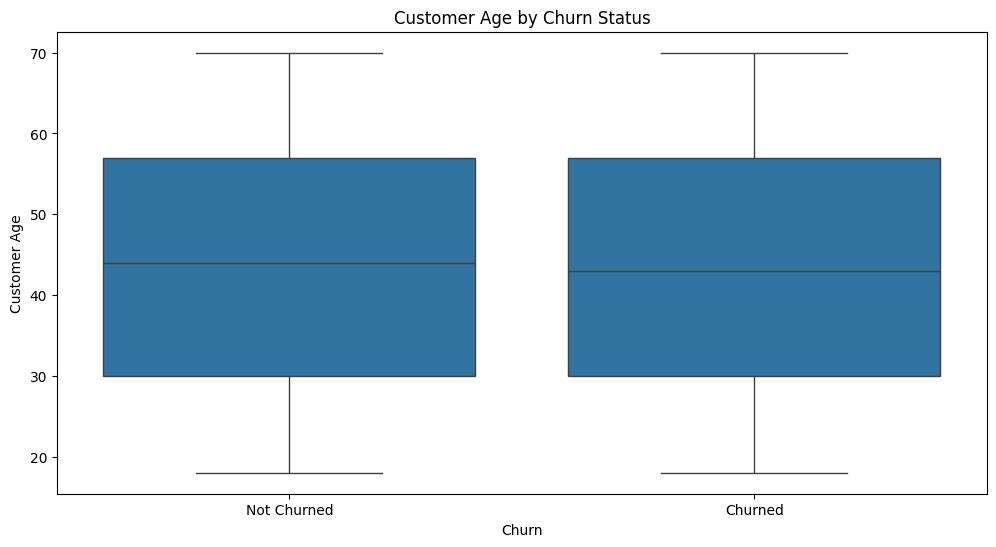

In [ ]:
# Check data types
print(df.dtypes)

# Convert 'Customer Age' to numeric, forcing errors to NaN
df['Customer Age'] = pd.to_numeric(df['Customer Age'], errors='coerce')

# Drop rows where 'Customer Age' or 'Churn' is NaN
df = df.dropna(subset=['Customer Age', 'Churn'])

# Check counts of churn values
print("Churn Counts:")
print(df['Churn'].value_counts())

# Check Customer Age statistics
print("\nCustomer Age Statistics:")
print(df['Customer Age'].describe())
print("NaN values in Customer Age:", df['Customer Age'].isnull().sum())

# Display sample of the relevant columns
print("\nSample Data:")
print(df[['Churn', 'Customer Age']].head(10))

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Churn', y='Customer Age')
plt.title("Customer Age by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Customer Age")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('ecommerce_customer_data_large.csv')

# Convert 'Churn' to numeric if it's not already (1 for Churned, 0 for Not Churned)
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

# Create a transition matrix for the Markov Model
# Assume Churn values are 0 (Not Churned) and 1 (Churned)
transition_matrix = np.zeros((2, 2))

# Count transitions
for i in range(len(df) - 1):
    current_churn = int(df['Churn'].iloc[i])
    next_churn = int(df['Churn'].iloc[i + 1])
    transition_matrix[current_churn, next_churn] += 1

# Normalize the transition matrix to get probabilities
transition_probabilities = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

print("Transition Matrix:")
print(transition_matrix)
print("\nTransition Probabilities:")
print(transition_probabilities)

# Simulate churn behavior
def simulate_churn(start_state, steps):
    state = start_state
    states = [state]
    for _ in range(steps):
        state = np.random.choice([0, 1], p=transition_probabilities[state])
        states.append(state)
    return states

# Example simulation
initial_state = 0  # Start with 'Not Churned'
simulation_steps = 10
simulation_result = simulate_churn(initial_state, simulation_steps)

print("\nSimulation Result (0: Not Churned, 1: Churned):")
print(simulation_result)


Transition Matrix:
[[191948.   7921.]
 [  7921.  42209.]]

Transition Probabilities:
[[0.96036904 0.03963096]
 [0.15800918 0.84199082]]

Simulation Result (0: Not Churned, 1: Churned):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


Transition Matrix:
[[191948.   7921.]
 [  7921.  42209.]]

Transition Probabilities:
[[0.96036904 0.03963096]
 [0.15800918 0.84199082]]


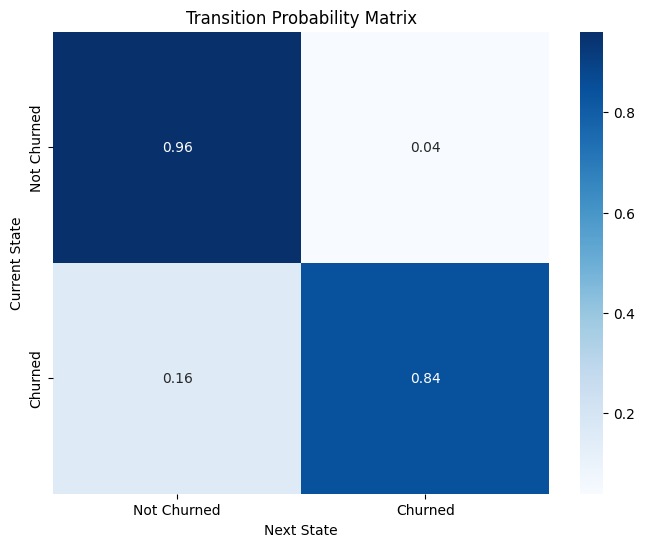


Churn Rate (Probability of Churn from Not Churned): 0.04
Not Churn Rate (Probability of Not Churned): 0.96


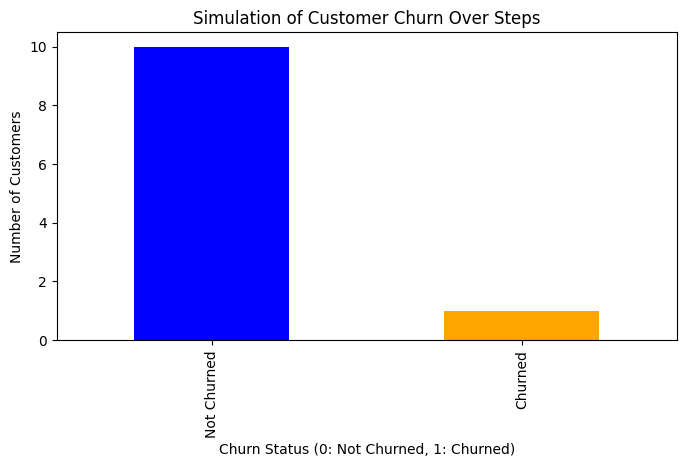

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming transition_probabilities has been calculated as shown in previous steps
print("Transition Matrix:")
print(transition_matrix)

print("\nTransition Probabilities:")
print(transition_probabilities)

# Create a heatmap for the transition probabilities
plt.figure(figsize=(8, 6))
sns.heatmap(transition_probabilities, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Transition Probability Matrix')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

# Summary of churn dynamics
churn_rate = transition_probabilities[0, 1]  # Probability of Churning
not_churn_rate = transition_probabilities[0, 0]  # Probability of Not Churning
print(f"\nChurn Rate (Probability of Churn from Not Churned): {churn_rate:.2f}")
print(f"Not Churn Rate (Probability of Not Churned): {not_churn_rate:.2f}")

# Simulation results visualization
simulation_result_counts = pd.Series(simulation_result).value_counts().sort_index()
plt.figure(figsize=(8, 4))
simulation_result_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Simulation of Customer Churn Over Steps')
plt.xlabel('Churn Status (0: Not Churned, 1: Churned)')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.show()
